In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

In [668]:
A = np.random.binomial(1,0.5,10000)
B = np.random.binomial(1,0.5,10000)

In [776]:
funcs = {'no_effect(doomed)':[1,1,1,1],'single_joint_causation': [1, 1, 1, 0], 'preventive_antagonismB1A1': [1, 1, 0, 1],
        'inneffective_causal':[1, 1, 0, 0], 'preventive_antagonismA1B1': [1 ,0 ,1 ,1], 'causal_ineffective':[1, 0 ,1, 0],
         'preventive_antagonism_mutual': [1, 0, 0, 1], 'causal_synergism':[1, 0, 0, 0], 'preventive_synergism':[0, 1, 1 ,1],
         'mutual_blocage':[0, 1, 1, 0], 'preventive_ineffective':[0, 1, 0, 1 ], 'A1_blocks_B1': [0, 1 ,0 ,0],
         'ineffective_preventive': [0 ,0 ,1 ,1], 'B1_blocks_A1': [0, 0, 1 ,0], 'single_joint_prevention': [0, 0, 0, 1 ],
         'no_effect(immune)': [0, 0, 0, 0, 0]

        
        }

In [777]:
for name, f in funcs.items():
    print(name)
    print(f)

no_effect(doomed)
[1, 1, 1, 1]
single_joint_causation
[1, 1, 1, 0]
preventive_antagonismB1A1
[1, 1, 0, 1]
inneffective_causal
[1, 1, 0, 0]
preventive_antagonismA1B1
[1, 0, 1, 1]
causal_ineffective
[1, 0, 1, 0]
preventive_antagonism_mutual
[1, 0, 0, 1]
causal_synergism
[1, 0, 0, 0]
preventive_synergism
[0, 1, 1, 1]
mutual_blocage
[0, 1, 1, 0]
preventive_ineffective
[0, 1, 0, 1]
A1_blocks_B1
[0, 1, 0, 0]
ineffective_preventive
[0, 0, 1, 1]
B1_blocks_A1
[0, 0, 1, 0]
single_joint_prevention
[0, 0, 0, 1]
no_effect(immune)
[0, 0, 0, 0, 0]


In [778]:
data={}
for name, f in funcs.items():
    Y=[]
    for a, b in zip(A,B):
        if a==1 and b==1:
            Y.append(f[0])
        if a==0 and b==1:
            Y.append(f[1])
        if a==1 and b==0:
            Y.append(f[2])
        if a==0 and b==0:
            Y.append(f[3])
    df = pd.DataFrame({'A':A, 'B':B, 'Y':Y})
    data[name]=df
        

In [805]:
SDA_s=[]
SDA_ALT = []
SDA_FULL = []
causal_effectA_s = []
interaction_s = []
totalA_s =[]
biasA_s = []

SDB_s=[]
causal_effectB_s = []
totalB_s =[]
biasB_s = []

female_black_s = []
male_black_s = []
female_white_s = []
male_white_s = []

name_s=[]

for name, df in data.items():
    name_s.append(name)
    PA1 = df[(df.A==1)&(df.Y==1)].shape[0]/df[(df.A==1)].shape[0]
    PA0=df[(df.A==0)&(df.Y==1)].shape[0]/df[(df.A==0)].shape[0]
    SDA = PA1-PA0
    SDA_s.append(SDA)
    PAB10 = df[(df.A==1)&(df.Y==1)&(df.B==0)].shape[0]/df[(df.A==1)&(df.B==0)].shape[0]
    PAB00 = df[(df.A==0)&(df.Y==1)&(df.B==0)].shape[0]/df[(df.A==0)&(df.B==0)].shape[0]
    PAB11 = df[(df.A==1)&(df.Y==1)&(df.B==1)].shape[0]/df[(df.A==1)&(df.B==1)].shape[0]
    PAB01 = df[(df.A==0)&(df.Y==1)&(df.B==1)].shape[0]/df[(df.A==0)&(df.B==1)].shape[0]
    causal_effectA = PAB10-PAB00
    causal_effectA_s.append(causal_effectA)
    interaction = PAB11 -PAB01-PAB10+ PAB00
    interaction_s.append(interaction)
    totalA =  causal_effectA+interaction
    totalA_s.append(totalA)
    biasA = SDA-totalA 
    biasA_s.append(biasA)
    
    ###
    PB1 = df[(df.B==1)&(df.Y==1)].shape[0]/df[(df.B==1)].shape[0]
    PB0= df[(df.B==0)&(df.Y==1)].shape[0]/df[(df.B==0)].shape[0]
    SDB=PB1-PB0 
    SDB_s.append(SDB)
    PAB01 = df[(df.A==0)&(df.Y==1)&(df.B==1)].shape[0]/df[(df.A==0)&(df.B==1)].shape[0]
    causal_effect_B = PAB01-PAB00
    causal_effectB_s.append(causal_effect_B)
    totalB = causal_effect_B+interaction
    totalB_s.append(totalB)
    biasB = SDB-totalB
    biasB_s.append(biasB)
    
    ###
    SDA_alt = PAB10-PAB01
    SDA_ALT.append(SDA_alt)
    PB1 = df[(df.B==1)].shape[0]/df.shape[0]
    SDA_full = SDA_alt+ interaction*PB1
    SDA_FULL.append(SDA_full)
    
    
    ###
    
    female_black_s.append(PAB00)
    male_black_s.append(PAB10)
 
    female_white_s.append(PAB01)
    male_white_s.append(PAB11)
    
results=pd.DataFrame({'Name': name_s,'SDA':SDA_s, 'SDA_ALT': SDA_ALT,'SDA_FULL':SDA_FULL, 'causal_effectA':causal_effectA_s, 'interaction':interaction_s,
                    'totalA':totalA_s,'biasA':biasA_s, 'SDB':SDB_s, 'causal_effectB':causal_effectB_s,
                     'totalB':totalB_s,'biasB':biasB_s, 'female_black':female_black_s, 'male_black':male_black_s,
                    'female_white':female_white_s, 'male_white':male_white_s })
    

    

In [817]:
df = data['preventive_antagonismB1A1']

In [818]:
df[(df.B==1)].shape[0]/df.shape[0]

0.4931

In [820]:
PAB10 = df[(df.A==1)&(df.Y==1)&(df.B==0)].shape[0]/df[(df.A==1)&(df.B==0)].shape[0]
PAB01 = df[(df.A==0)&(df.Y==1)&(df.B==1)].shape[0]/df[(df.A==0)&(df.B==1)].shape[0]
PAB10-PAB01

-1.0

In [819]:
PA1 = df[(df.A==1)&(df.Y==1)].shape[0]/df[(df.A==1)].shape[0]
PA0=df[(df.A==0)&(df.Y==1)].shape[0]/df[(df.A==0)].shape[0]
PA1-PA0

-0.5104208416833667

In [806]:
results

,Name,SDA,SDA_ALT,SDA_FULL,causal_effectA,interaction,totalA,biasA,SDB,causal_effectB,totalB,biasB,female_black,male_black,female_white,male_white
0,no_effect(doomed),0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,1.0,1.0
1,single_joint_causation,0.503393,0.0,-0.4931,1.0,-1.0,0.0,0.503393,0.497534,1.0,0.0,0.497534,0.0,1.0,1.0,1.0
2,preventive_antagonismB1A1,-0.510421,-1.0,-0.5069,-1.0,1.0,0.0,-0.510421,0.502466,0.0,1.0,-0.497534,1.0,0.0,1.0,1.0
3,inneffective_causal,-0.007028,-1.0,-1.0000,0.0,0.0,0.0,-0.007028,1.000000,1.0,1.0,0.000000,0.0,0.0,1.0,1.0
4,preventive_antagonismA1B1,0.496607,1.0,1.4931,0.0,1.0,1.0,-0.503393,-0.504563,-1.0,0.0,-0.504563,1.0,1.0,0.0,1.0
5,causal_ineffective,1.000000,1.0,1.0000,1.0,0.0,1.0,0.000000,-0.007029,0.0,0.0,-0.007029,0.0,1.0,0.0,1.0
6,preventive_antagonism_mutual,-0.013814,0.0,0.9862,-1.0,2.0,1.0,-1.013814,-0.002097,-1.0,1.0,-1.002097,1.0,0.0,0.0,1.0
7,causal_synergism,0.489579,0.0,0.4931,0.0,1.0,1.0,-0.510421,0.495437,0.0,1.0,-0.504563,0.0,0.0,0.0,1.0
8,preventive_synergism,-0.489579,0.0,-0.4931,0.0,-1.0,-1.0,0.510421,-0.495437,0.0,-1.0,0.504563,1.0,1.0,1.0,0.0
9,mutual_blocage,0.013814,0.0,-0.9862,1.0,-2.0,-1.0,1.013814,0.002097,1.0,-1.0,1.002097,0.0,1.0,1.0,0.0


In [790]:
import matplotlib.pyplot as plt

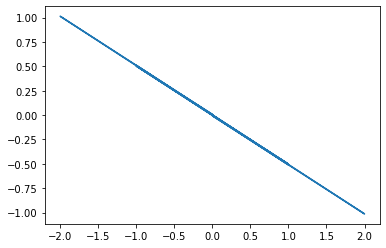

In [791]:
plt.plot(results.interaction, results.biasA)

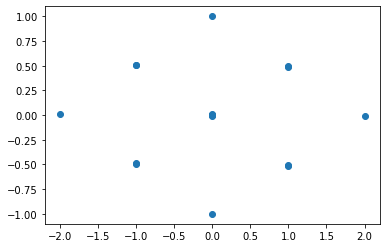

In [796]:
plt.scatter(results.interaction, results.SDA)

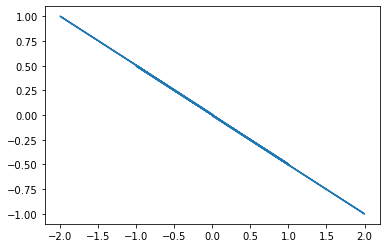

In [792]:
plt.plot(results.interaction, results.biasB)

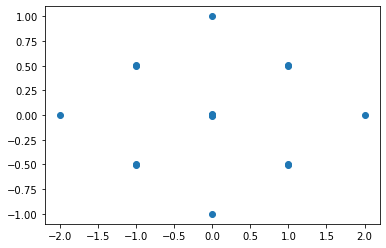

In [797]:
plt.scatter(results.interaction, results.SDB)

In [4]:
a = np.random.normal(10,5,1000)
b = np.random.normal(10,3,1000)
c = np.random.normal(5,2,1000)
y = 3+0.5*a+0.7*b+0.9*a*b+0.2*c
df = pd.DataFrame({'A':a, 'B':b, 'C':c, 'Y':y })

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=df.drop('Y', axis=1)
y=df.Y
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

0.9508792436183782 [9.42422124 9.2177437  0.24290131] -81.76355613867291


Second case

In [852]:
a = np.random.normal(10,5,1000)
b = np.random.normal(10,3,1000)
c = np.random.normal(5,2,1000)
y = 3+0.5*a+0.7*b+0.2*c
df = pd.DataFrame({'A':a, 'B':b, 'C':c, 'Y':y })

In [853]:
X=df.drop('Y', axis=1)
y=df.Y
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

1.0 [0.5 0.7 0.2] 3.0000000000000018


Third Case

In [855]:
a = np.random.binomial(1,0.5,1000)
b = np.random.binomial(1,0.5,1000)
c = np.random.normal(5,2,1000)
y = 3+0.5*a+0.7*b+0.2*c
df = pd.DataFrame({'A':a, 'B':b, 'C':c, 'Y':y })

In [858]:
X=df.drop('Y', axis=1)
y=df.Y
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

1.0 [0.5 0.7 0.2] 3.000000000000001


Fourth Case

In [118]:
pa=0.9
pb = 0.5
a = np.random.binomial(1,pa,10000)
b = np.random.binomial(1,pb,10000)
c = np.random.normal(5,2,10000)
y = 3+0.3*a+0.5*b+0.6*a*b+0.2*c
df = pd.DataFrame({'A':a, 'B':b, 'C':c, 'Y':y })

In [119]:
X=df.drop('Y', axis=1)
y=df.Y
reg = LinearRegression().fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

0.9827499734970173 [0.60775357 1.03944563 0.19987786] 2.7228777703082865


In [102]:
reg.coef_[0]+reg.coef_[1] - (0.3+0.5+0.6)

0.0012861833484549834

In [117]:
(0.3+0.5+0.6)

1.4

In [120]:
((reg.coef_[0]-(pa*0.6))+(reg.coef_[1]-pb*0.6) +0.6 )

1.407199198987103

In [115]:
pa*0.6

0.3

In [105]:
(0.3+0.5+0.6)

1.4

In [42]:
reg.coef_[0]+reg.coef_[1]

1.399416166737172

In [11]:
X[X.B==0]

,A,B,C
0,1,0,1.541637
4,1,0,8.998672
5,0,0,7.338392
6,1,0,0.627049
7,1,0,7.822161
...,...,...,...
9993,0,0,10.442306
9995,0,0,0.028747
9996,0,0,5.504112
9997,0,0,3.962596
